#**Polyhedron representation**

A convex polytope is a special case of a polytope, having the additional property that it is also a convex set contained in the $n$-dimensional Euclidean space $\mathbb {R}^{n}$.

> A convex polytope may be defined as an intersection of a finite number of half-spaces. Such definition is called a half-space representation ($H$-representation or $H$-description). This can be concisely written as the matrix inequality:
\begin{equation}
A x \leq b
\end{equation}
where $A$ is an $m\times n$ matrix, $x$ is an ${\displaystyle n\times 1}$ column vector whose coordinates are the variables $x_{1}$ to $x_{n}$, and $b$ is an ${\displaystyle m\times 1}$ column vector whose coordinates are the right-hand sides $b_{1}$ to $b_{m}$ of the scalar inequalities.

>A convex polytope may be defined as the convex hull of its vertices + the conic hull of its rays where '+' is the Minkowski sum. This is equivalent to defining a bounded convex polytope as the convex hull of a finite set of points, where the finite set must contain the set of extreme points of the polytope. This representation is called $V$-representation and can be written
\begin{equation}
x=conv(V)+coni(R)
\end{equation}
where $conv$ denotes the convex hull of a set of vertices $V=\{v_1, ... ,v_p\}$:
\begin{equation}
conv(V) = \Bigl\{ \sum_{i=1}^{p} α_i v_i \quad \textrm{s.t.} \quad \forall i, \alpha_i \geq 0, \sum_{i=1}^{p} α_i =1 \Bigr\}
\end{equation}
while $coni$ is the conical hull os a set of rays $R=\{r_1,...,r_q\}$:
\begin{equation}
coni(R) = \Bigl\{ \sum_{j=1}^{q} \lambda_i r_i \quad \textrm{s.t.} \quad \forall j, \lambda_i \geq 0 \Bigr\}
\end{equation}

**Example**

$H$-representation
\begin{equation}
\begin{aligned}
\begin{bmatrix} 0 & 1 \\ 5 & -2\\ -1 & -3\\-4 & -2 \end{bmatrix}
\begin{bmatrix} x\\y \end{bmatrix} \leq
\begin{bmatrix} 7 \\ 36 \\ -14 \\ -26 \end{bmatrix}
\end{aligned}
\end{equation}

$V$-representation
\begin{equation}
V=\{(3,7),(10,7),(8,2),(5,3)\}
\end{equation}

*Theorem (Minkowski and Weyl)*: any polyhedron can be equivalently described in halfspace or vertex representation. That is, for any set
$P = \{ x \, | \, A x \leq b\}$, there exists two sets $V$ and $R$ such that $P=conv(V)+coni(R)$, and conversely.

In [ ]:
!pip install polytope

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.0/51.0 KB 1.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for polytope: filename=polytope-0.2.3-py3-none-any.whl size=46059 sha256=c26455e9e6becde1b09b1428322ea38d6c625502f1db33200182aa7dc1e0445c
  Stored in directory: /root/.cache/pip/wheels/dc/0b/33/e063a044f930977e4897732d007122648d9db0e50934094040
Successfully built polytope


In [ ]:
import numpy as np
import polytope
import matplotlib.pyplot as plt

vertices = np.array([[3, 7], [10, 7], [8, 2], [5, 3]])
poly = polytope.qhull(vertices)  # convex hull
    # `poly` is an instance of the class `polytope.polytope.Polytope`,
    # which is for representing convex polytopes.
    # Nonconvex polytopes can be represented too,
    # using the class `polytope.polytope.Region`.
print('Halfspace representation of convex polytope:')
print('matrix A:')
print(poly.A)
print('vector b:')
print(poly.b)

Halfspace representation of convex polytope:
matrix A:
[[-0.89443 -0.44721]
 [ 0.       1.     ]
 [-0.31623 -0.94868]
 [ 0.92848 -0.37139]]
vector b:
[-5.81378  7.      -4.42719  6.68503]


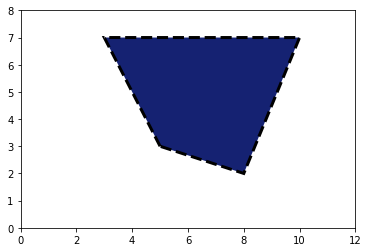

In [ ]:
poly.plot()
plt.xlim(0,12)
plt.ylim(0,8)
plt.show()

#**Trajectory planning**
Given convex region defined by linear inequalities $\{x: A_ix \leq b_i \}$ ($H$-representation) find the sequence of $K$ points from the given starting point to the given goal point, such that all of the steps lie in the convex region.

#**Exercise**
You are given three non empty sets:

\begin{equation*}
\begin{aligned}
x_{(1)},...,x_{(n)} \\
y_{(1)},...,y_{(m)} \\
z_{(1)},...,z_{(p)} \\
\end{aligned}
\end{equation*} in $\mathbb{R}^n$ where you have to find corresponding affine functions in the following form:
\begin{equation}
    f_i(\mu) = a_i^T\mu -b_i, \; i=1,2,3, \; \mu = x,y,z
\end{equation} subject to the following constraints:
\begin{equation*}
\begin{aligned}
\quad & f_1(x_{(j)}) > max \{f_2(x_{(j)}), f_3(x_{(j)})\}, \; j = 1,...,n\,\\
  \quad & f_2(y_{(j)}) > max \{f_1(y_{(j)}), f_3(y_{(j)})\}, \; j = 1,...,m\,\\
  \quad & f_3(z_{(j)}) > max \{f_1(z_{(j)}), f_2(z_{(j)})\}, \; j = 1,...,p\,\\
 \quad & a_1 + a_2 + a_3 = 0, \\
 \quad & b_1 + b_2 + b_3 = 0 ,
\end{aligned}
\end{equation*}
> Use the following script for generating three sets in $\mathbf{R}^2$ and solve the latter problem using CVXPY

[-0.38721924 -0.81906945] [-5.28905679]


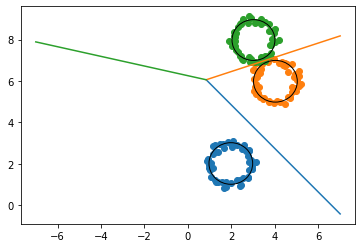

In [ ]:
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt
import random
from random import random
import math


def clusters(n, points, centers, r):
    sets = []
    def cluster(points, center, radius):
        npoints = 50
        r = radius
        t = np.linspace(0, 2*np.pi, npoints, endpoint=False)
        x = center[0] + r * np.cos(t) + np.random.uniform(-0.2,0.2,t.shape[0])
        y = center[1] + r * np.sin(t) + np.random.uniform(-0.2,0.2,t.shape[0])
        return np.vstack((x,y))

    sets = []
    for i in range(n):
        set_i = cluster(points, centers[i], r)
        sets.append(set_i)
    return sets

sets = np.array(clusters(3, 100, [(2,2), (4,6), (3, 8)], 1.0))

def get_circle(U):
    cx = cp.Variable()
    cy = cp.Variable()
    obj = cp.Minimize(cp.norm(cp.vstack((U[0,:] - cx, U[1,:] - cy))))
    prob = cp.Problem(obj, [])
    prob.solve()

    cx, cy = map(lambda x: x.value, [cx, cy])
    xc = np.array([cx, cy])
    r_hat = (U.T - xc)
    mean_r = np.sum(r_hat * r_hat, axis=1).mean()
    r = np.sqrt(mean_r)
    return xc, r

def draw_circles(sets):
    ax = plt.gca()
    for set_i in sets:
        xc, r = get_circle(set_i)
        circle = plt.Circle(xc, r, fill=False)
        ax.add_patch(circle)

X = sets[0]
Y = sets[1]
Z = sets[2]

a1 = cp.Variable(shape=(2,))
b1 = cp.Variable(shape=(1,))
a2 = cp.Variable(shape=(2,))
b2 = cp.Variable(shape=(1,))
a3 = cp.Variable(shape=(2,))
b3 = cp.Variable(shape=(1,))

constraints = [
  a1.T @ X - b1 >= cp.maximum(a2.T @ X - b2,a3.T @ X - b3),
  a2.T @ Y - b2 >= cp.maximum(a3.T @ Y - b3,a1.T @ Y - b1),
  a3.T @ Z - b3 >= cp.maximum(a1.T @ Z - b1,a2.T @ Z - b2),
  a1 + a2 + a3 == 0,
  b1 + b2 + b3 == 0
]

obj = cp.Minimize(0)
prob = cp.Problem(obj, constraints)
prob.solve()

a1,a2,a3,b1,b2,b3 = map(lambda x: x.value,[a1,a2,a3,b1,b2,b3])
print(a1,b1)

t = np.linspace(-7,7,100*14)
u1 = a1-a2; u2 = a2-a3; u3 = a3-a1
v1 = b1-b2; v2 = b2-b3; v3 = b3-b1
line1 = (-t*u1[0]+v1)/u1[1]
idx1 = np.where(u2.dot(np.array([t,line1]))-v2>0)[0]
line2 = (-t*u2[0]+v2)/u2[1]
idx2 = np.where(u3.dot(np.array([t,line2]))-v3>0)[0]
line3 = (-t*u3[0]+v3)/u3[1]
idx3 = np.where(u1.dot(np.array([t,line3]))-v1>0)[0]

draw_circles(sets)

plt.scatter(X[0,:], X[1,:])
plt.scatter(Y[0,:], Y[1,:])
plt.scatter(Z[0,:], Z[1,:])

plt.plot(t[idx1],line1[idx1])
plt.plot(t[idx2],line2[idx2])
plt.plot(t[idx3],line3[idx3])
plt.show()

#**Friction cones**
 A 2D mass is in contact with a single surface. This contact will remain fixed as long as the contact force $f^c = mg-f^{ext}$ lies within the Coulomb friction cone $C$.